In [ ]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Download the training and test sets (the test set will actually be used as a validation set):

In [ ]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 69.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 57.8MB/s]


Define some globals with the path to both files you just downloaded:

In [ ]:

TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [ ]:

with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [ ]:
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file, delimiter=' ')

    labels = []
    images = []

    count = 0
    for row in csv_reader:
      if (count > 0):
        row = row[0].split(',')
        row = list(map(float, row))
        # import pdb; pdb.set_trace()
        images.append(row[1:])
        labels.append(row[0])
      count += 1

    # reshape the images
    images, labels = np.array(images), np.array(labels)
    to_size = int(images.shape[1]**0.5)
    images = np.reshape(images, (images.shape[0], to_size, to_size))

    return images, labels

In [ ]:

# Test your function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


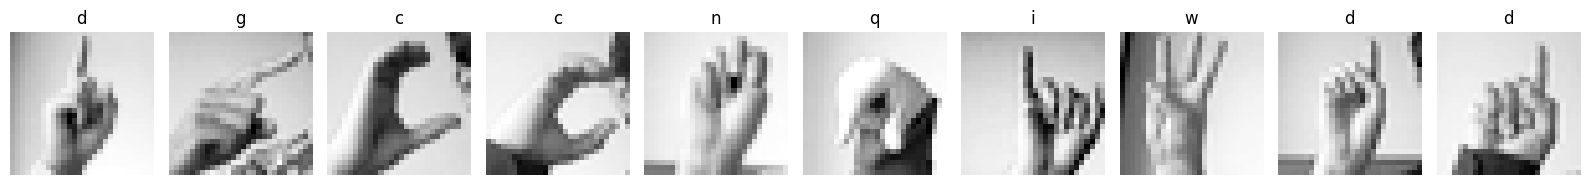

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [ ]:
img = training_images[1]
img = np.expand_dims(img, axis=-1)
img = array_to_img(img)

In [ ]:
validation_images[1].shape

(28, 28)

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # In this section you will have to add another dimension to the data
  # So, for example, if your array is (10000, 28, 28)
  # You will need to make it (10000, 28, 28, 1)
  # Hint: np.expand_dims
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.1,
      zoom_range=0.3,
      horizontal_flip=False,
      fill_mode='nearest')


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)


  return train_generator, validation_generator

In [ ]:

# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [ ]:

def create_model():


  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(1)
    tf.keras.layers.Dense(26, activation='softmax')
  ])


  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 34s 28ms/step - loss: 2.1222 - accuracy: 0.3481 - val_loss: 0.9941 - val_accuracy: 0.6495
Epoch 2/15
858/858 [==============================] - 25s 29ms/step - loss: 1.0303 - accuracy: 0.6621 - val_loss: 0.7303 - val_accuracy: 0.7241
Epoch 3/15
858/858 [==============================] - 24s 28ms/step - loss: 0.6710 - accuracy: 0.7776 - val_loss: 0.2461 - val_accuracy: 0.9142
Epoch 4/15
858/858 [==============================] - 24s 28ms/step - loss: 0.4926 - accuracy: 0.8376 - val_loss: 0.1420 - val_accuracy: 0.9639
Epoch 5/15
858/858 [==============================] - 26s 30ms/step - loss: 0.3969 - accuracy: 0.8691 - val_loss: 0.1720 - val_accuracy: 0.9367
Epoch 6/15
858/858 [==============================] - 25s 30ms/step - loss: 0.3191 - accuracy: 0.8938 - val_loss: 0.0917 - val_accuracy: 0.9689
Epoch 7/15
858/858 [==============================] - 28s 33ms/step - loss: 0.2690 - accuracy: 0.9115 - val_loss: 0.0852 - val_accuracy:

In [ ]:
# save model .h5 format
model.save('CNN-Sign-Language.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_validation_images = validation_images / 255

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [ ]:
evaluation_results = model.evaluate(validation_generator)

print("Evaluation Loss:", evaluation_results[0])
print("Evaluation Accuracy:", evaluation_results[1])

225/225 [==============================] - 1s 5ms/step - loss: 0.0459 - accuracy: 0.9863
Evaluation Loss: 0.04591221734881401
Evaluation Accuracy: 0.9863357543945312


In [ ]:
test_images = validation_generator.x
test_images = test_images[100]
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
img = validation_images[100]
img = np.expand_dims(img, axis=-1)
img = array_to_img(img)
img

In [ ]:
reshaped_img_array = resized_image.reshape(-1, 28, 28, 1)

In [ ]:
prediction = model.predict(reshaped_img_array)
prediction.shape

1/1 [==============================] - 0s 25ms/step


(1, 26)

In [ ]:
prediction = model.predict(test_images)
prediction.shape

1/1 [==============================] - 0s 19ms/step


(1, 26)

In [ ]:
pred = prediction[0].tolist()

In [ ]:
pred_index = pred.index(1)
predict_letter = string.ascii_uppercase[pred_index]
print("Hasil Prediksi : " + predict_letter)

Hasil Prediksi : K


In [ ]:
img = resized_image
img = np.expand_dims(img, axis=-1)
img = array_to_img(img)
img

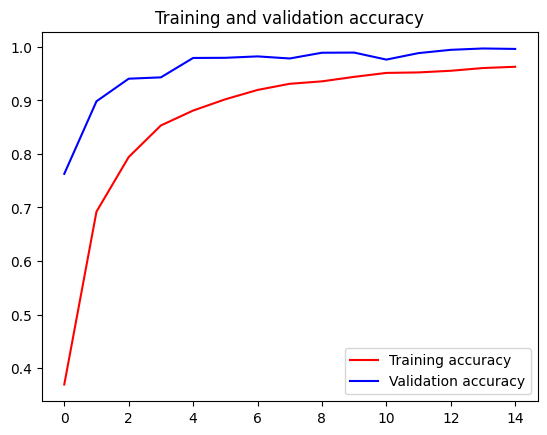

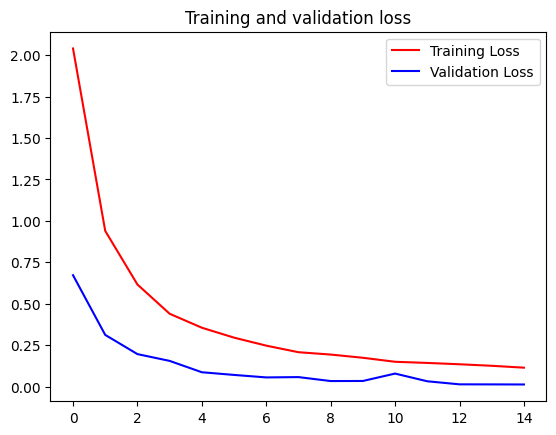

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Prediction

In [ ]:
import cv2
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = load_model('/content/drive/MyDrive/Python/machine-learnig/CNN-Sign-Language.h5')

In [ ]:
image_path = "/content/drive/MyDrive/Python/machine-learnig/y-sign.jpeg"
img = Image.open(image_path)
img = np.array(img)
print("Dimensi Gambar Sebelum Reshape:", img.shape)
if len(img.shape) == 3:
    img_array = np.mean(img, axis=-1)

print("Dimensi Gambar Setelah Konversi:", img_array.shape)

Dimensi Gambar Sebelum Reshape: (183, 205, 3)
Dimensi Gambar Setelah Konversi: (183, 205)


In [ ]:
resized_image = cv2.resize(img_array, (28, 28))

In [ ]:
reshaped_img_array = resized_image.reshape(-1, 28, 28, 1)

In [ ]:
prediction = model.predict(reshaped_img_array)

1/1 [==============================] - 2s 2s/step


In [ ]:
import string

In [ ]:
pred = prediction[0].tolist()
pred_index = pred.index(1)
predict_letter = string.ascii_uppercase[pred_index]
print("Hasil Prediksi : " + predict_letter)

Hasil Prediksi : Y


In [ ]:
!pip install pyautogui

In [3]:
import pyautogui
import time
import random

# Function to perform auto clicks
def auto_clicker(num_clicks, click_delay):
    try:
        print("Auto Clicker will start in 3 seconds. Move your mouse to the desired click location.")
        time.sleep(3)

        for _ in range(num_clicks):
            x, y = pyautogui.position()  # Get current mouse position
            pyautogui.click(x, y)       # Perform a mouse click
            print(f"Click at ({x}, {y})")
            time.sleep(random.uniform(click_delay - 0.1, click_delay + 0.1))  # Add some randomness to the delay

        print("Auto Clicker has finished.")
    except KeyboardInterrupt:
        print("Auto Clicker stopped.")

# Main function
def main():
    print("Python Auto Clicker")
    print("-------------------")
    num_clicks = int(input("Enter the number of clicks: "))
    click_delay = float(input("Enter the click delay (in seconds): "))

    auto_clicker(num_clicks, click_delay)

if __name__ == "__main__":
    main()

KeyError: 'DISPLAY'